# HW 1 


#### Author1:

 Amit Levi         -   207422650     -         Amitlevi@campus.technion.ac.il

 
#### Author2: 

Shahaf Benitah   -    318700291     -         Shahafb@campus.technion.ac.il




##  Implementation Part

### Requirements
- **Image Specifications**: Use a gray-scale image with 256 gray levels and a size of at least 512×512 pixels.

- **Image Display**: Ensure that the image is shown in its original size and range throughout the analysis.

- **Figure Formatting**: All figures should be appropriately titled, and font sizes should be clearly legible.

- **Documentation**: Include a comprehensive report describing your results and conclusions. The code must be well-documented.

- **Data Presentation**: Figures and graphs must be included in the report alongside explanations that demonstrate your understanding of the exercise and its outcomes.

- **Algorithm Implementation**: It is crucial to implement the algorithms and procedures such as quantizers, samplers, and error-calculation functions by yourself. Do not use pre-built functions available in Python libraries or from the web.


## 1: Image Quantization



## Preliminary Setup

Before we start the quantization processes and algorithm implementations, it's essential to prepare our environment by downloading necessary libraries and an image for our experiments.

### Step 1: Library Installation

We will need several libraries for image processing tasks. 



In [198]:
#!pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

In [199]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import requests
from io import BytesIO
from skimage import io, transform, color


## Exercise 1: Image Quantization

### 1. Estimating the Probability Density Function (PDF)
- **Task**: Estimate the PDF of the gray levels in the image using the image histogram. If the histogram appears too uniform, indicating low contrast or lack of variability, select another image with a more varied gray level distribution.

The image does not have 256 gray levels.


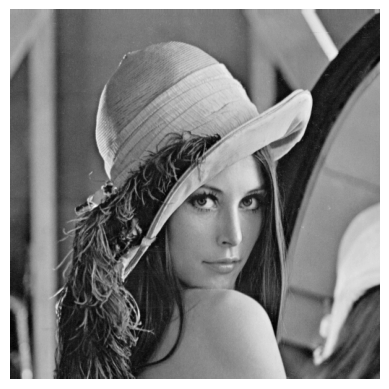

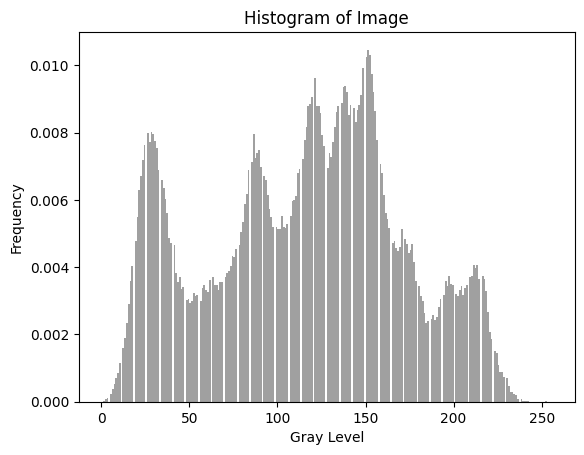

In [200]:

# URL of 512x512  image 256 gray levels

### CODE HERE ###
########################################################################################################################
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
########################################################################################################################



# Function to scale image to 256 gray levels
def scale_to_256_levels(img):
    """
    Scales the image to have exactly 256 gray levels with noise added.
    """
    img = np.array(img)
    img_min = np.min(img)
    img_max = np.max(img)
    img_scaled = (img - img_min) / (img_max - img_min) * 255
    img_scaled = np.round(img_scaled).astype(np.uint8)
    return Image.fromarray(img_scaled)

  


# URL of the 512x512 image with 256 gray levels
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'

# Load the image from the URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Convert the image to grayscale
img_gray = img.convert('L')

scaled_img = scale_to_256_levels(img_gray)

if 256 == len(np.unique(np.array(scaled_img))):
    print('The image has 256 gray levels.')
else:
    print('The image does not have 256 gray levels.')

# Plot the image
plt.imshow(scaled_img, cmap='gray')
plt.axis('off')
plt.show()
img = scaled_img
# Measure the image gray level distribution to quickly approximate the image uniformity
def too_uniform(img):
    """
    Function to test if the image is too uniform.
    Returns True if the image is too uniform, False otherwise.
    """
    hist, _ = np.histogram(np.array(img).ravel(), bins=256, range=(0, 256))
    threshold = 0.05 * np.prod(img.size)  # 5% of the total number of pixels
    if np.max(hist) > threshold:
        return True
    return False




def too_uniform(img):
    """
    Determine if the image is too uniform by evaluating the variance of the histogram.
    """
    histogram = np.histogram(img, bins=256)[0]
    return np.var(histogram) < 100  # Adjust the threshold as per your requirements




def image_requirement(img):
    """
    Check if the image meets the following requirements:
    - Exactly 512x512 pixels
    - Contains exactly 256 gray levels
    """
    # Scale the image to 256 gray levels first
    img = scale_to_256_levels(img)
    if img.size != (512, 512):
        print('The image does not meet the size requirements.\nSize: ' + str(img.size))
        return False
   
    if len(np.unique(np.array(img))) > 256:
        print('The image does not meet the gray level requirements.\nGray levels: ' + str(unique_levels))
        return False
    if too_uniform(img):
        print('The image is too uniform.')
        return False
    print('The image meets all requirements.')
    return True


# Plot the histogram of the image
plt.hist(np.array(img).ravel(), bins=256, range=(0, 256), density=True, color='gray', alpha=0.75)
plt.xlabel('Gray Level')
plt.ylabel('Frequency')
plt.title('Histogram of Image')
plt.show()
    

### Image Uniformity Check

In [201]:
img = scaled_img.resize((512, 512))

# Test if the image is too uniform
if too_uniform(img):
    print('The image is too uniform   :( ')
else:
    print('The image is not too uniform   :)')
    
# Test if the image meets the requirements
image_requirement(img)


The image is not too uniform   :)
The image meets all requirements.


True


### 1.2 Uniform Quantization
- **Task**: Apply uniform quantization to the image using `b` bits per pixel.
    - **2a. Mean Squared Error (MSE)**: Display the MSE as a function of the bit-budget `b` for `b = 1, ..., 8`.

## Uniform Quantization Process

### Conceptual Overview

Uniform quantization is a technique used to reduce the number of possible values that each pixel can represent in an image, by mapping a range of pixel values to a single quantization level. This process is crucial in image compression, where reducing the number of bits per pixel helps in storing or transmitting the image using less data.

### Key Steps in Uniform Quantization

1. **Bit Budget \( b \)**: This parameter defines the number of bits available per pixel, which directly influences the number of quantization levels \( L \) available. Specifically, $( L = 2^b )$ . Thus, a higher bit budget allows a more precise representation of the original image but uses more data.
   
2. **Quantization Step**: Each possible pixel value from 0 to 255 is divided into \( L \) intervals, each represented by a unique quantization level. The step size $( \Delta )$ is defined as $( \Delta = \frac{256}{L} )$, assuming pixel values range from 0 to 255.

3. **Decision Levels**: These are the thresholds that determine how input values are mapped to different quantization levels. The decision levels are typically calculated at every $( \Delta )$ units from 0 to 255.

4. **Representation Levels**: After deciding the levels, each range of values is assigned a representative value (often the midpoint of the range), which is used to replace all values within that range in the quantized image.

### Mean Squared Error (MSE)

#### Conceptual Definition
The Mean Squared Error (MSE) is a common measure of the quality of an estimator—it is always non-negative, and values closer to zero are better. In the context of image processing, MSE measures the average squared difference between the original and the quantized image's pixel values, providing a quantitative indicator of the distortion introduced by quantization.

#### Mathematical Definition
The MSE for an image is defined as:
$ \text{MSE} = \frac{1}{MN} \sum_{i=1}^{M} \sum_{j=1}^{N} \left( I(i,j) - Q(i,j) \right)^2 $
where:
- $ I(i,j) $ is the original image's pixel value at position (i, j).
- $ Q(i,j) $ is the quantized image's pixel value at position (i, j).
- $ M $ and $ N $ are the dimensions of the image.




## Implementation :

### 1. "mse" 

**Description:**  
The `mean` function calculates the average value of all the elements in an array, effectively summing up all elements and dividing by the number of elements.


**Input:**
- `array`: The array of values for which the mean needs to be calculated.


**Output:**
- `mse`: The mean value of the elements in the array.


**Mathematical Formula:**  

The mathematical formula for calculating the mean of an array of values is given by:
$ \text{mean} = \frac{1}{N} \sum_{i=1}^{N} x_i $
where:
- $ N $ is the number of elements in the array.
- $ x_i $ represents the value of the element at index i in the array.
    
$ \text{MSE} = \frac{1}{MN} \sum_{i=1}^{M} \sum_{j=1}^{N} \left( I(i,j) - Q(i,j) \right)^2 $

**Usage in MSE Calculation:**  
In the context of MSE, `mean` is employed to compute the average of the squared differences between the original and quantized images, indicating the distortion level introduced by quantization.


In [202]:
def calculate_mse(original_image, quantized_image):
    original_array = np.array(original_image, dtype=float)
    quantized_array = np.array(quantized_image, dtype=float)
    mse_sum = 0.0
    count = original_array.size
    for i in range(original_array.shape[0]):
        for j in range(original_array.shape[1]):
            mse_sum += (original_array[i, j] - quantized_array[i, j]) ** 2
    mse = mse_sum / count
    return mse

def uniform_quantization(image, levels):
    """
    Input:
    img:    Grayscale image
    levels: Number of quantization levels

    Output:
    quantized_img: Quantized image
    """
    # Define the quantization step
    delta = 255 / (levels - 1)
    
    # Quantize the image
    img_array = np.array(image, dtype=float)
    quantized_array = np.floor(img_array / delta + 0.5) * delta
    quantized_array = np.clip(quantized_array, 0, 255)
    
    return Image.fromarray(quantized_array.astype(np.uint8))




# Quantize the image to 2 gray levels
quantized_image = uniform_quantization(img, 2)


original_array = np.array(img, dtype=float)
quantized_array = np.array(quantized_image, dtype=float)
mse_np = np.mean((original_array - quantized_array) ** 2)
mse_manual = calculate_mse(img, quantized_image)

if np.isclose(mse_manual, mse_np):
    print('PASSED')
else:
    print('FAILED')


PASSED


## Implementation:

###  `uniform_quantization`

**Description:**  
The `uniform_quantization` function quantizes a grayscale image to a specified number of levels using uniform quantization. This means it reduces the number of distinct gray levels in the image to the desired number of levels.

**Input:**
- `image`: The grayscale image to be quantized.
- `levels`: The number of quantization levels desired.

**Output:**
- `quantized_img`: The quantized image.

**Steps:**
1. **Define the Quantization Step (`delta`):**  
   The quantization step is calculated as:
   $
   \delta = \frac{255}{\text{levels} - 1}
   $
   This step size determines the range of pixel values that will be mapped to each quantization level.

2. **Quantize the Image:**  
   The image array is divided by `delta`, rounded to the nearest integer, and then multiplied by `delta` to obtain the quantized pixel values. This effectively maps each original pixel value to the nearest quantization level.

3. **Clip the Quantized Values:**  
   The pixel values are clipped to ensure they lie within the valid range [0, 255].

4. **Return the Quantized Image:**  
   The quantized array is converted back to an image and returned.



MSE for b=1: 7706.904430389404


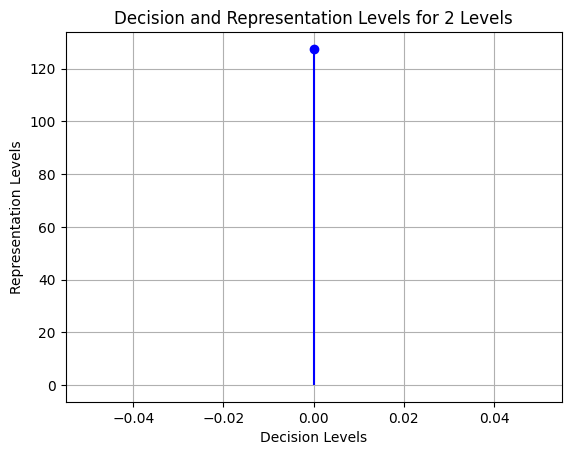

MSE for b=2: 678.4020805358887


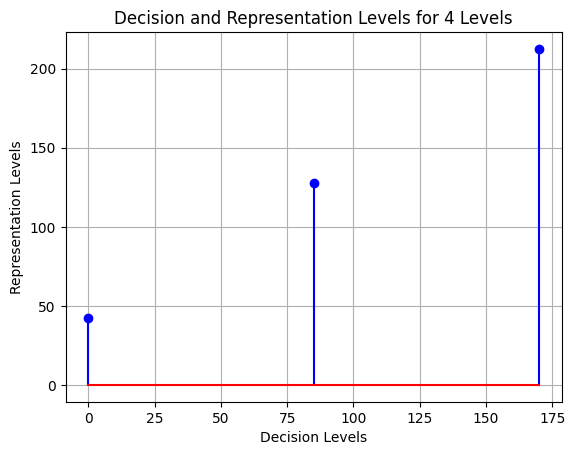

MSE for b=3: 108.91276550292969


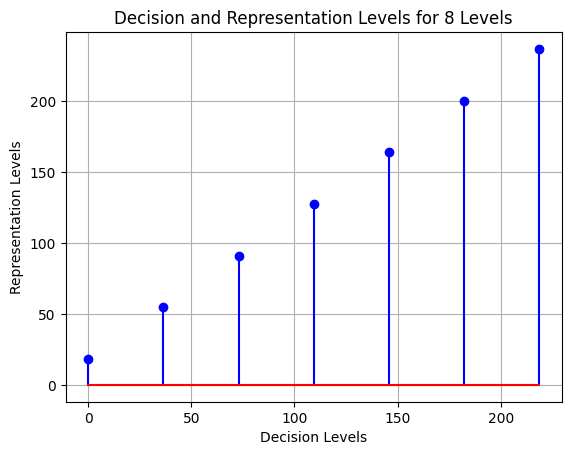

MSE for b=4: 23.507274627685547


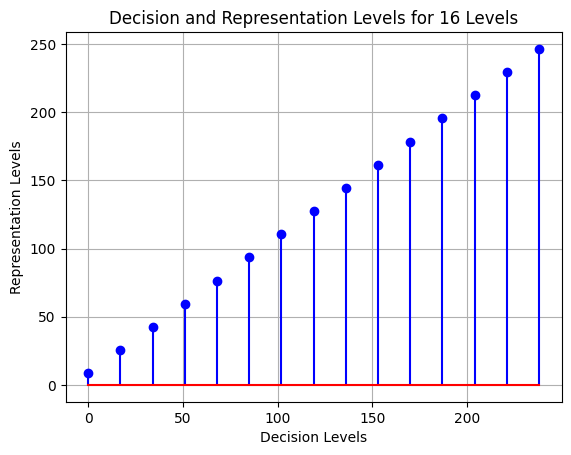

MSE for b=5: 5.9627838134765625


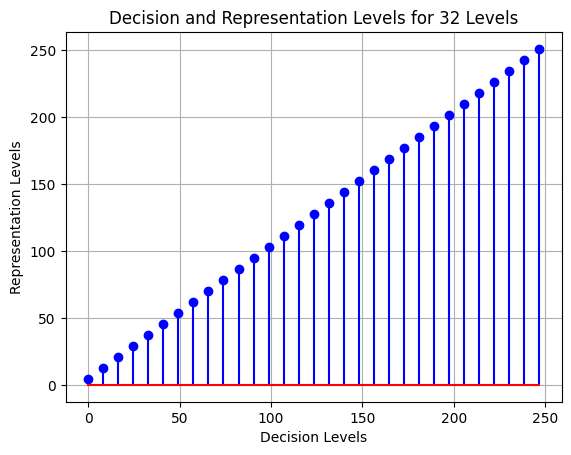

MSE for b=6: 1.5265312194824219


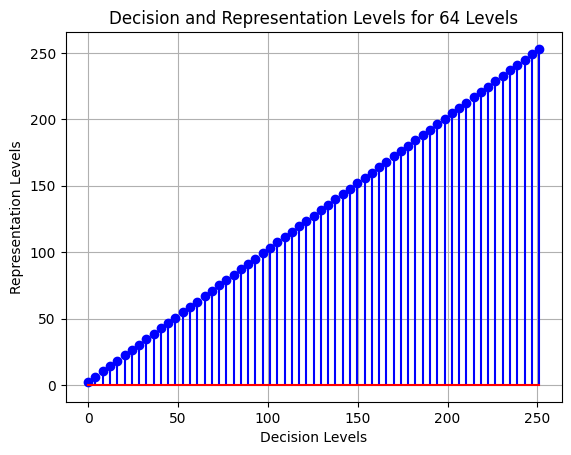

MSE for b=7: 0.4865150451660156


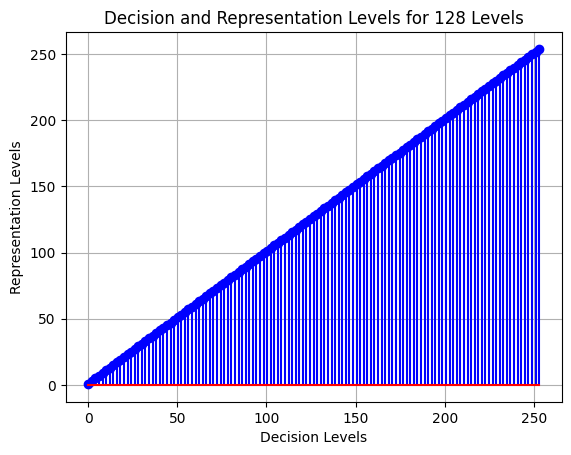

MSE for b=8: 0.0


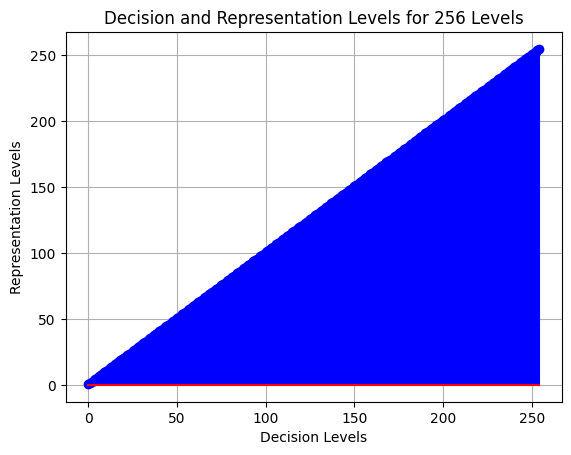

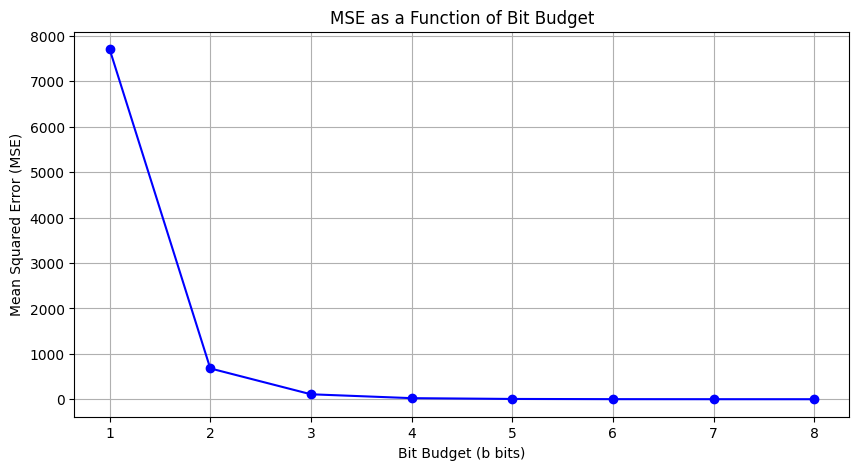

In [203]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt



def display_levels(levels):
    """
    Displays the decision and representation levels for the given number of quantization levels.
    
    Input:
    levels: Number of quantization levels
    """
    delta = 255 / (levels - 1)
    decision_levels = np.arange(0, 256, delta)
    representation_levels = (decision_levels[:-1] + decision_levels[1:]) / 2
    plt.figure()
    plt.stem(decision_levels[:-1], representation_levels, linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.title(f'Decision and Representation Levels for {levels} Levels')
    plt.xlabel('Decision Levels')
    plt.ylabel('Representation Levels')
    plt.grid(True)
    plt.show()



# Initialize a list to store MSE for each bit budget
mse_values = []

# Test uniform quantization and calculate MSE from b=1 to b=8
for b in range(1, 9):
    quantized_image = uniform_quantization(img, 2 ** b)
    mse = calculate_mse(img, quantized_image)
    mse_values.append(mse)
    print(f'MSE for b={b}: {mse}')

    # Display the decision and representation levels
    display_levels(2 ** b)

# Plot MSE as a function of bit budget
plt.figure(figsize=(10, 5))
plt.plot(range(1, 9), mse_values, marker='o', linestyle='-', color='b')
plt.title('MSE as a Function of Bit Budget')
plt.xlabel('Bit Budget (b bits)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()



## 1.3 Implementation of the Max-Lloyd Algorithm

### Description
The Max-Lloyd algorithm, also known as the Lloyd-Max algorithm, is used for scalar quantization of a signal to minimize the Mean Squared Error (MSE) between the original and the quantized signal. This algorithm is iterative and finds optimal decision levels and representation levels.

### Inputs
- `pdf`: Probability density function representing the histogram of the signal's values.
- `initial_decision_levels`: Initial guesses for the decision levels.
- `epsilon`: Convergence tolerance, a small value to determine when to stop iterations based on MSE improvements.

### Outputs
- `converged_decision_levels`: Final decision levels after convergence.
- `converged_representation_levels`: Representation levels corresponding to the converged decision levels.

### Process
1. **Initialization**: Begin with the initial decision levels.
2. **Iterative Process**:
   - Update representation levels based on current decision levels.
   - Update decision levels based on the new representation levels.
   - Calculate MSE and check for convergence with `epsilon`.
3. **Convergence**: Stop if the improvement in MSE is less than `epsilon`.

### Mathematical Concepts
- **Representation Levels**: $ r_i = \frac{\int_{d_{i-1}}^{d_i} x \cdot p(x) \, dx}{\int_{d_{i-1}}^{d_i} p(x) \, dx} $

where $ p(x) $ is the PDF of the signal, $ d_{i-1} $  and  $ d_i $ are the decision levels, and $ r_i $ is the representation level, which is the average value of the signal within the interval defined by the decision levels.
The representation levels is the average value of the signal within the interval defined by the decision levels.
The reason for this is because our goal is to minimize the MSE between the original and quantized signals, and the representation levels are the best estimates of the signal values within each quantization interval.

- **Decision Levels**: $ d_i = \frac{r_i + r_{i+1}}{2} $

where $ r_i $ and $ r_{i+1} $ are the representation levels corresponding to the decision levels $ d_i $ and $ d_{i+1} $.


The MSE is calculated during each iteration and the algorithm stops iterating when the change in MSE is less than the provided `epsilon`.


In [204]:
import numpy as np

def calculate_mse(pdf, decision_levels, representation_levels):
    ### CODE HERE ###
    ########################################################################################################################
    mse = 0
    for i in range(len(decision_levels) - 1):
        start = int(decision_levels[i])
        end = int(decision_levels[i+1])
        if start < end:  # Ensure the segment has more than one element
            segment = pdf[start:end]
            indexes = np.linspace(start, end - 1, num=len(segment))  # Match the length of the segment
            mse += np.sum(segment * (representation_levels[i] - indexes) ** 2)
    ########################################################################################################################
    return mse




def max_lloyd_algorithm(pdf, initial_decision_levels, epsilon):
    ### CODE HERE ###
    ########################################################################################################################
    # Convert the initial decision levels to a numpy array
    decision_levels = np.array(initial_decision_levels)
    # Initialize the representation levels
    representation_levels = (decision_levels[:-1] + decision_levels[1:]) / 2
    # Calculate the initial MSE
    mse = calculate_mse(pdf, decision_levels, representation_levels)
    ########################################################################################################################

    while True:
        ### CODE HERE ###
        ########################################################################################################################
        # Update the representation levels
        for i in range(1, len(decision_levels)):
            start = int(decision_levels[i-1])
            end = int(decision_levels[i])
            if end > start:
                segment = pdf[start:end]
                indexes = np.linspace(start, end - 1, num=len(segment))  # Match the length of the segment
                if np.any(segment):
                    representation_levels[i-1] = np.dot(segment, indexes) / np.sum(segment)
        
        # Update the decision levels
        for i in range(1, len(decision_levels) - 1):
            decision_levels[i] = (representation_levels[i-1] + representation_levels[i]) / 2
        
        # Calculate the new MSE
        new_mse = calculate_mse(pdf, decision_levels, representation_levels)
        if abs(mse - new_mse) < epsilon:
            break
        mse = new_mse
        ########################################################################################################################

    return decision_levels, representation_levels

# Example data and initial decision levels
pdf = np.random.rand(256)  # Random data representing PDF
initial_decision_levels = np.linspace(0, 255, num=9)  # Uniform initial decision levels for 8-bit quantization
epsilon = 1e-6

# Test the function
decision_levels, representation_levels = max_lloyd_algorithm(pdf, initial_decision_levels, epsilon)
print('Decision Levels:', decision_levels)
print('Representation Levels:', representation_levels)

Decision Levels: [  0.          31.13646511  61.29708221  94.84167727 126.09343353
 156.05844325 188.08398332 220.33016228 255.        ]
Representation Levels: [ 17.00447791  45.26845231  77.32571211 112.35764244 139.82922461
 172.2876619  203.88030474 236.78001981]


## 1.4 Max-Lloyd Quantization and Comparison with Uniform Quantization

### Overview
This task involves applying the Max-Lloyd quantizer starting with uniform quantization levels and analyzing the results across different bit-budgets.

### Tasks
1. **Apply Max-Lloyd Quantizer**: Starting with a uniform quantizer setup, apply the Max-Lloyd algorithm for bit budgets from 1 to 8 bits.
2. **MSE Analysis**:
    - Plot Mean Squared Error (MSE) as a function of the bit-budget `b` for `b = 1, ..., 8`.
3. **Visualization**:
    - Plot the decision and representation levels for representative values of `b`.
4. **Comparison**:
    - Compare these results with those obtained using a uniform quantizer.
    - Discuss the differences in the outcomes, focusing on efficiency and fidelity.

### Expected Outcomes
The task aims to highlight how the adaptive nature of Max-Lloyd quantization optimizes the quantizer design over a uniform approach, expected to reduce MSE significantly as the bit-budget increases.


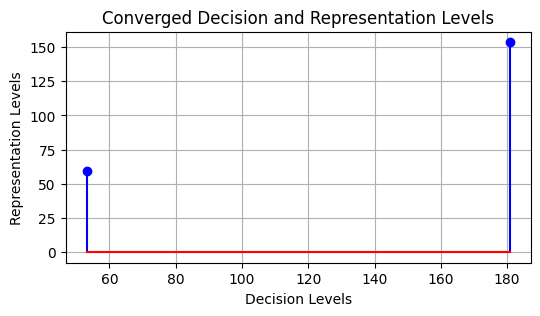

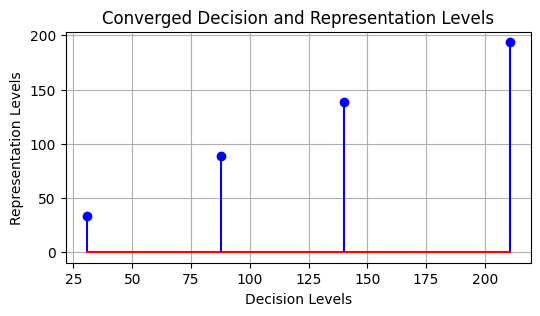

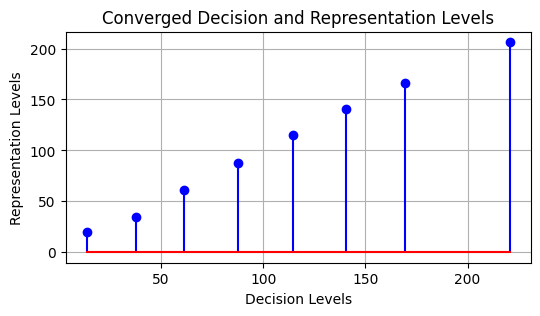

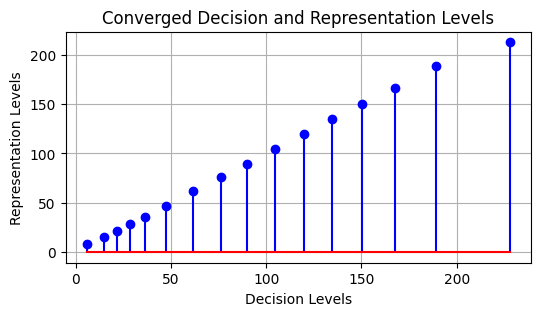

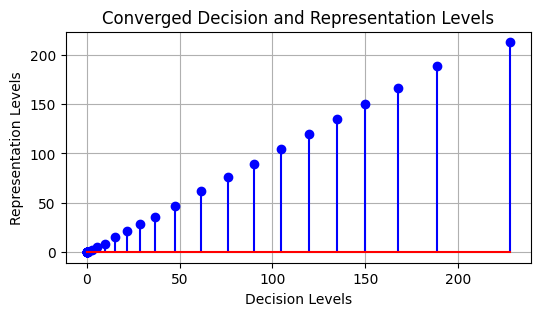

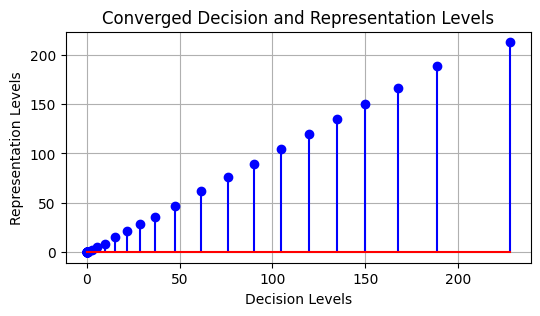

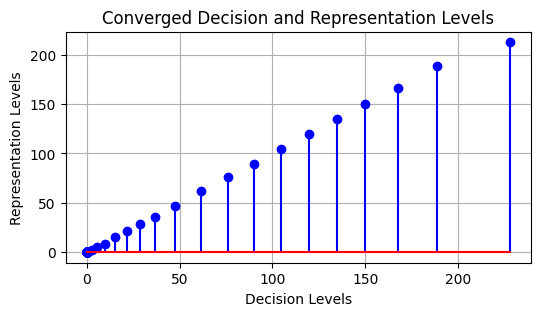

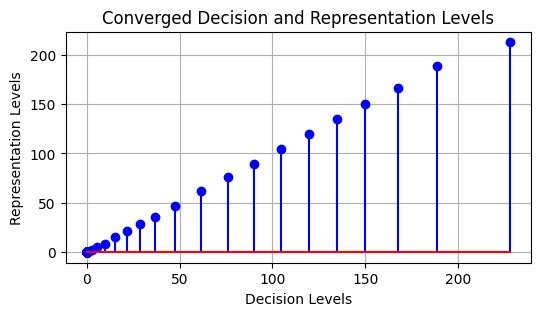

In [205]:

pdf, _ = np.histogram(np.array(img).ravel(), bins=256, range=(0, 256))
epsilon = 1e-6

import matplotlib.pyplot as plt

def plot_decision_representation_levels(decision_levels, representation_levels):
    # Ensure the arrays are aligned for plotting
    # Calculate mid-points of decision levels for plotting representation levels
    if len(decision_levels) > len(representation_levels):
        decision_points = (decision_levels[:-1] + decision_levels[1:]) / 2
    else:
        decision_points = decision_levels
    
    # Create the stem plot
    plt.figure(figsize=(6, 3))
    plt.stem(decision_points, representation_levels, linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.title('Converged Decision and Representation Levels')
    plt.xlabel('Decision Levels')
    plt.ylabel('Representation Levels')
    plt.grid(True)
    plt.show()

for b in range(1, 9):
    levels = 2 ** b
    initial_decision_levels = np.linspace(0, 255, num=levels + 1)
    decision_levels, representation_levels = max_lloyd_algorithm(pdf, initial_decision_levels, epsilon)
    plot_decision_representation_levels(decision_levels, representation_levels)




# 2. Subsampling and Reconstruction

## 2.1 Subsampling and Reconstruction

1. **Image as a Discrete 2D Sampled Signal**: 
   Consider an image as a discrete 2D sampled signal denoted as $I(x, y)$, where $x$ and $y$ are the position indices on the images. Crop or resize your image such that its number of rows and columns are a power of 2 greater than 8. For integer sub-sampling factors $D = 2^1, 2^2, \cdots, 2^8$, grid the image domain uniformly in $x$ and $y$, giving $N_x \times N_y$ uniform rectangular grid sample regions. Each region will be subsampled using a unique optimal number in some sense.

### Tasks:
#### a. MSE Analysis:
   - In the MSE sense, present the sub-sampled image for all different $D$. Denote these sub-sampled images by $\{\tilde{J}_i\}_{i=1}^{8}$.
   - Show the MSE as a function of the integer sub-sampling factor $D$.
   
   The Mean Squared Error (MSE) is calculated as:
   $
   \text{MSE} = \frac{1}{N_x \times N_y} \sum_{x=1}^{N_x} \sum_{y=1}^{N_y} (I(x, y) - \tilde{I}(x, y))^2
   $
   where $\tilde{I}(x, y)$ is the reconstructed image after subsampling.

#### b. MAD Analysis:
   - In the MAD sense, present the sub-sampled image for all different $D$. Denote these sub-sampled images by $\{\hat{J}_i\}_{i=1}^{8}$.
   - Show the MAD as a function of the integer sub-sampling factor $D$.
   
   The Mean Absolute Deviation (MAD) is calculated as:
   $
   \text{MAD} = \frac{1}{N_x \times N_y} \sum_{x=1}^{N_x} \sum_{y=1}^{N_y} |I(x, y) - \hat{I}(x, y)|
   $
   where $\hat{I}(x, y)$ is the reconstructed image after subsampling.

   ***sub-sampled image***: The image obtained after subsampling the original image using a specific integer sub-sampling factor $D$.
   input image: The original image to be subsampled and reconstructed.
   integer sub-sampling factor $D$: The factor by which the image is subsampled in both dimensions, where $D = 2^1, 2^2, \cdots, 2^8$.
   reconstructed image: The image obtained after reconstructing the subsampled image using an appropriate interpolation method.

   MSE: The Mean Squared Error between the original image and the reconstructed image.
   
   MAD: The Mean Absolute Deviation between the original image and the reconstructed image.
   


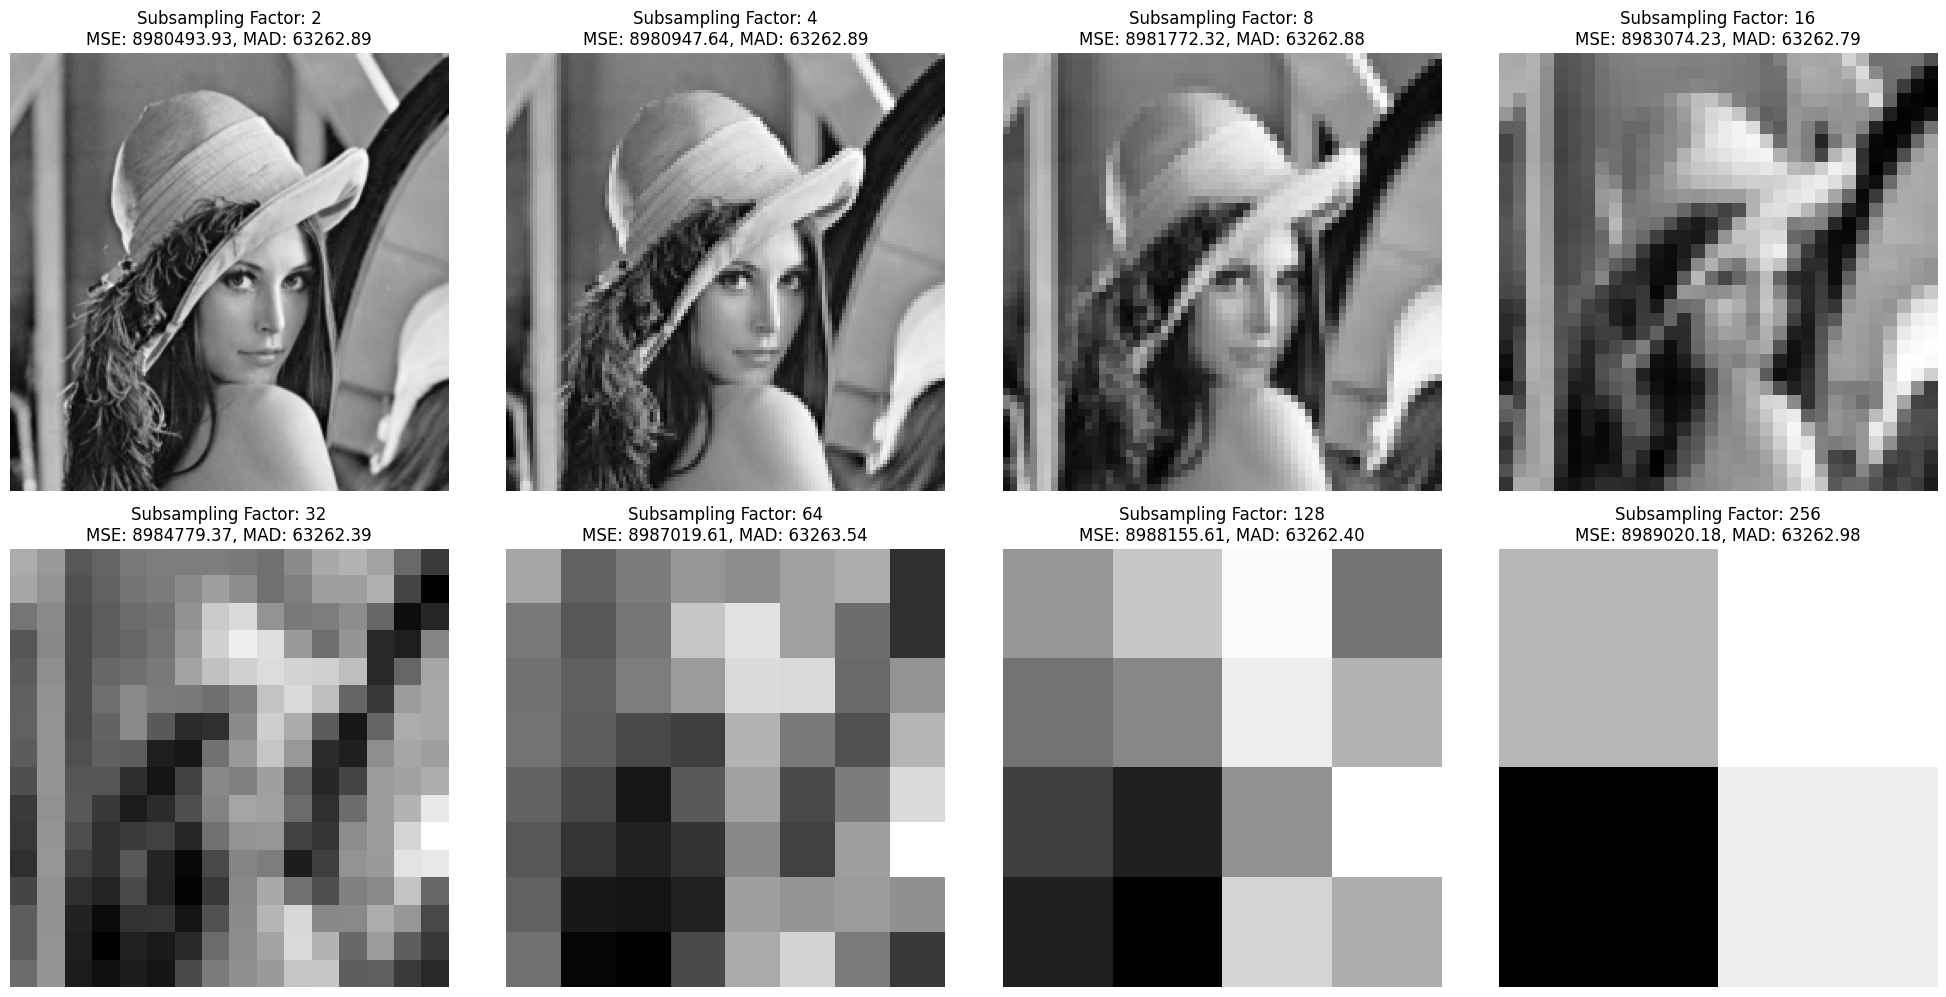

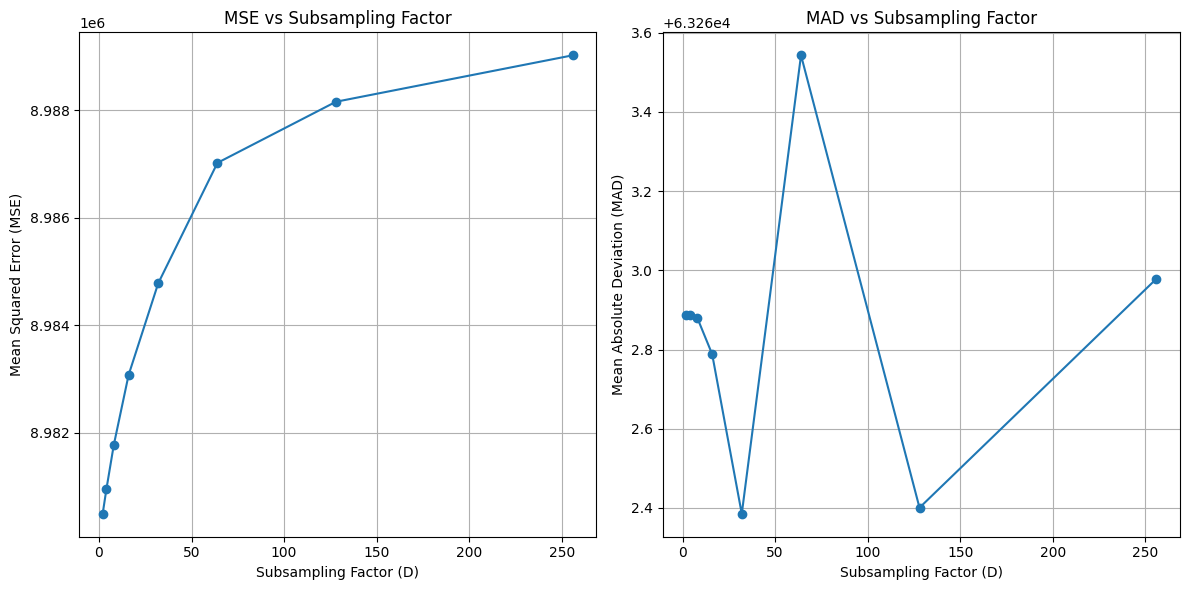

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, color
import requests
from PIL import Image
from io import BytesIO

def mean(values):
    """Calculates the mean of the given values."""
    return np.sum(values) / len(values)

def subsample_image(image, factor):
    """Subsamples the image by the given factor."""
    ### CODE HERE ###
    ########################################################################################################################
    subsampled = transform.resize(image, 
                                  (image.shape[0] // factor, image.shape[1] // factor), 
                                  anti_aliasing=True)
    ########################################################################################################################
    return subsampled

def calculate_mse(original, subsampled, factor):
    """Calculates the Mean Squared Error between the original and the subsampled image."""
    ### CODE HERE ###
    ########################################################################################################################
    resized = transform.resize(subsampled, original.shape, anti_aliasing=True)
    mse = mean((original - resized) ** 2)
    ########################################################################################################################
    return mse

def calculate_mad(original, subsampled=None, factor=None):
    """Calculates the Mean Absolute Deviation between the original and the subsampled image."""
    ### CODE HERE ###
    ########################################################################################################################
    resized = transform.resize(subsampled, original.shape, anti_aliasing=True)
    mad = mean(np.abs(original - resized))
    ########################################################################################################################
    return mad

# Load and preprocess the image
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
response = requests.get(url)

# Load the image
img = Image.open(BytesIO(response.content)).convert('L')

# Resize the image to 512x512
img = img.resize((512, 512))
image = np.array(img)

# Define the subsampling factors
factors = [2**i for i in range(1, 9)]
mse_values = []
mad_values = []

plt.figure(figsize=(20, 20))
for i, factor in enumerate(factors, 1):
    # Subsample the image
    subsampled = subsample_image(image, factor)
    
    # Calculate MSE and MAD
    mse = calculate_mse(image, subsampled, factor)
    mad = calculate_mad(image, subsampled, factor)
    
    mse_values.append(mse)
    mad_values.append(mad)
    
    # Plot subsampled images
    plt.subplot(4, 4, i)
    plt.imshow(subsampled, cmap='gray')
    plt.title(f'Subsampling Factor: {factor}\nMSE: {mse:.2f}, MAD: {mad:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Plot MSE and MAD as functions of the subsampling factor
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(factors, mse_values, marker='o', linestyle='-')
plt.title('MSE vs Subsampling Factor')
plt.xlabel('Subsampling Factor (D)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(factors, mad_values, marker='o', linestyle='-')
plt.title('MAD vs Subsampling Factor')
plt.xlabel('Subsampling Factor (D)')
plt.ylabel('Mean Absolute Deviation (MAD)')
plt.grid(True)

plt.tight_layout()
plt.show()




### 2.2 **Reconstruction**:
   Reconstruct the subsampled images $\{\tilde{J}_i\}_{i=1}^{8}$ and $\{\hat{J}_i\}_{i=1}^{8}$ back to the same size as the original image, denoted by $\{\tilde{K}_i\}_{i=1}^{8}$ and $\{\hat{K}_i\}_{i=1}^{8}$. Present $\{\tilde{K}_i\}_{i=1}^{8}$ and $\{\hat{K}_i\}_{i=1}^{8}$


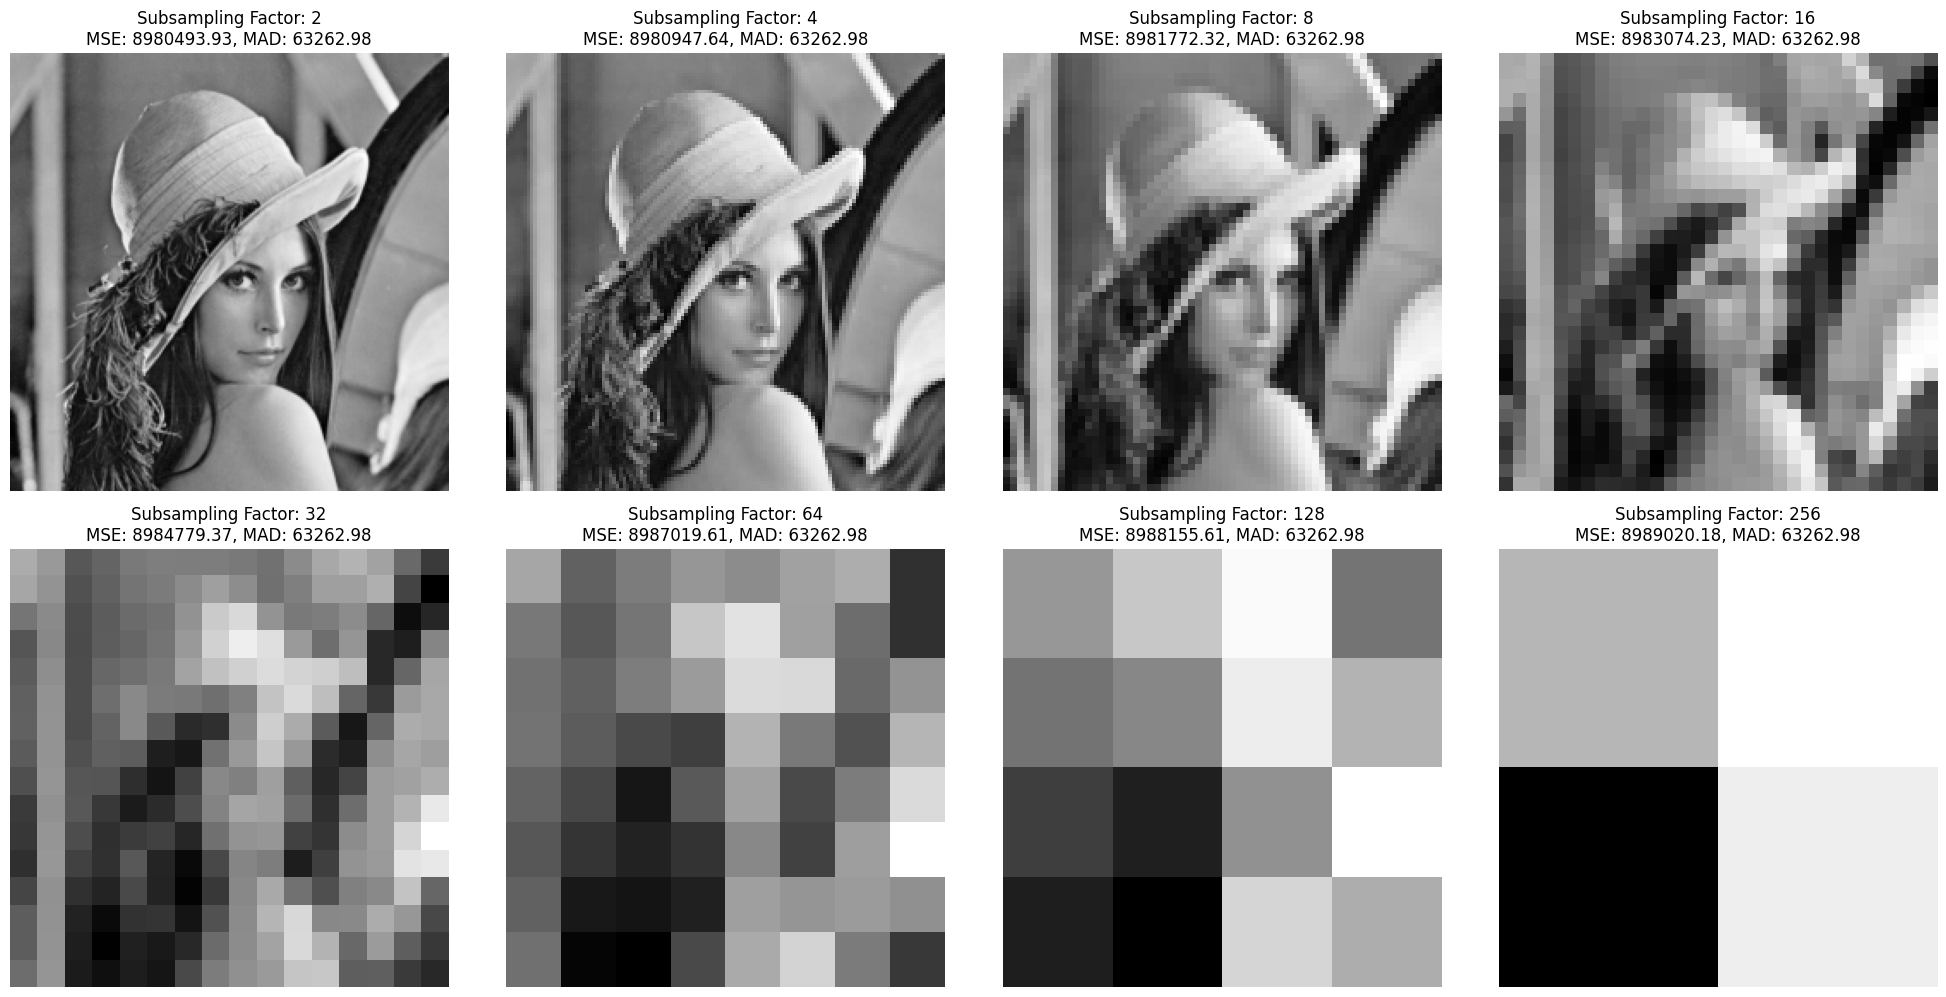

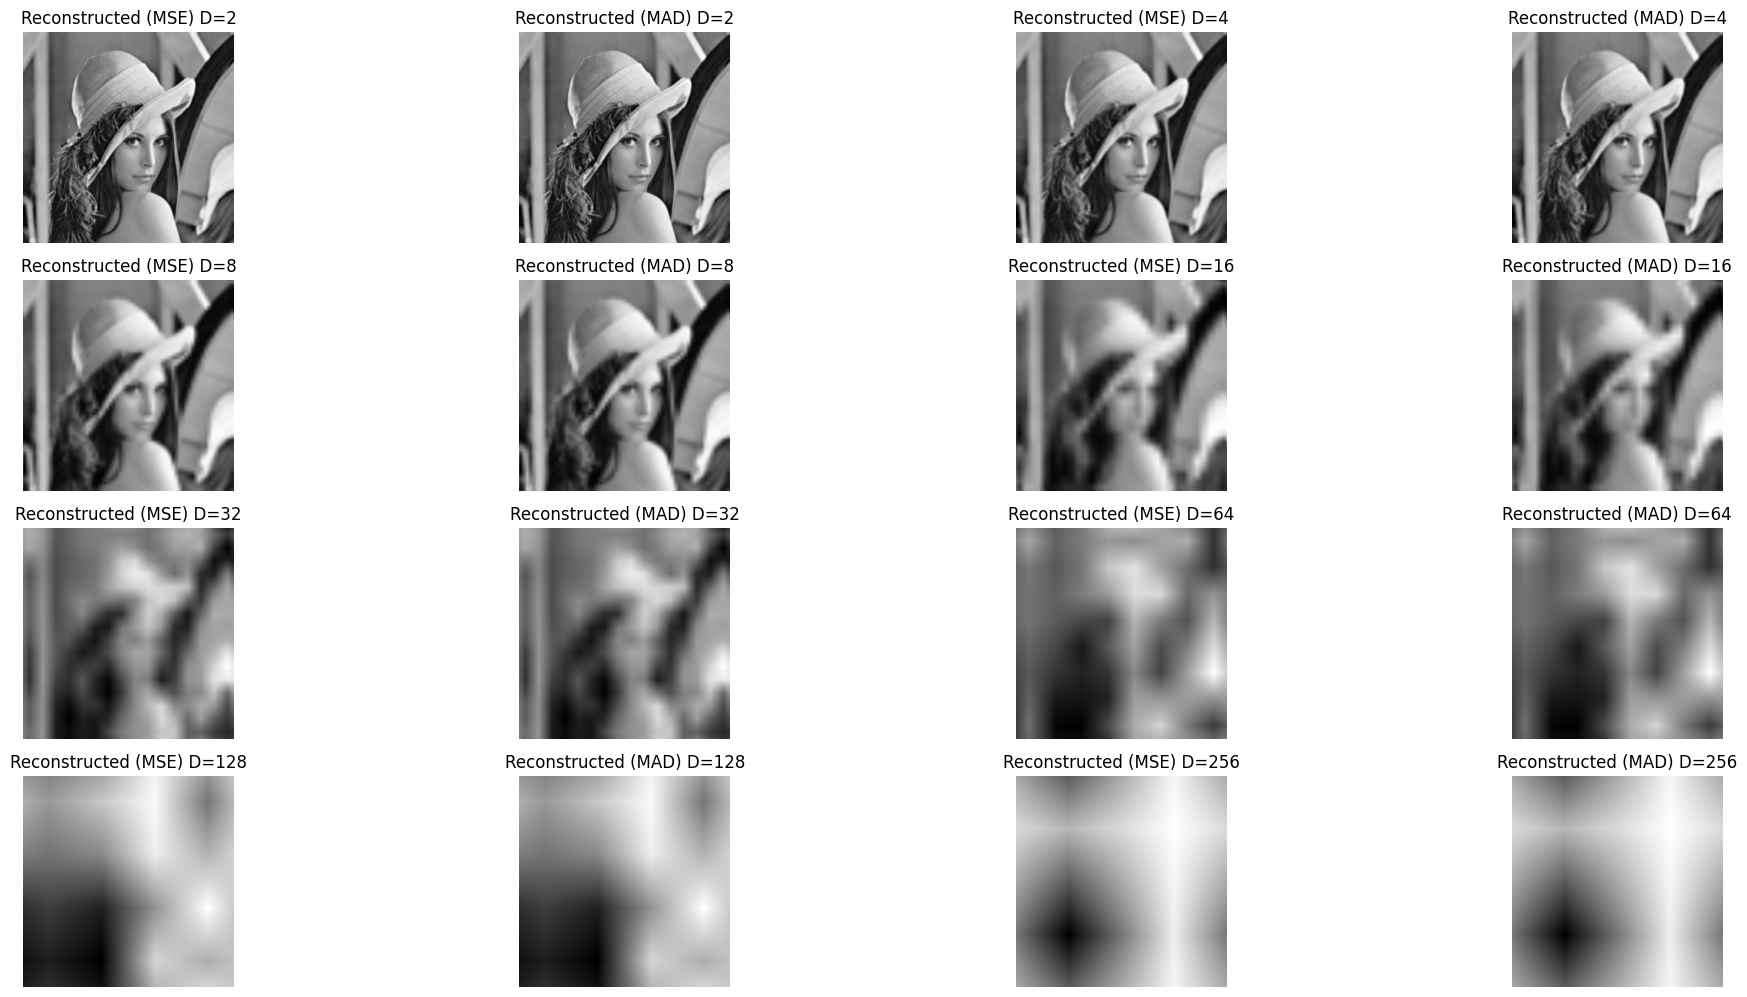

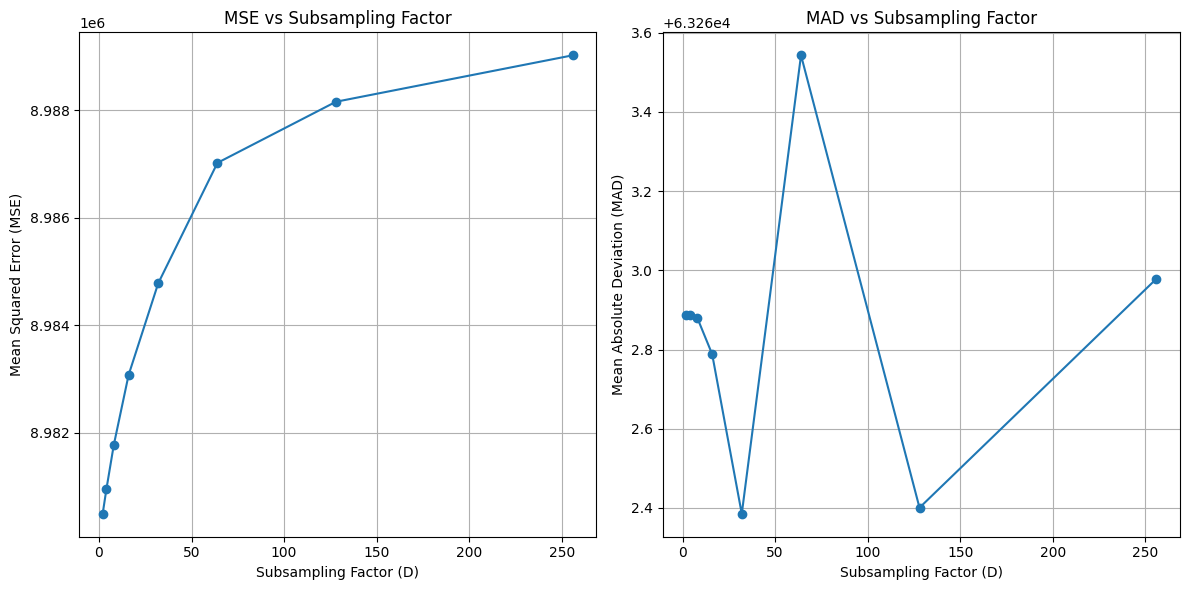

In [207]:

# Resize the image to 512x512
img = img.resize((512, 512))
image = np.array(img)

# Define the subsampling factors
factors = [2**i for i in range(1, 9)]
mse_values = []
mad_values = []

# Prepare lists for reconstructed images
reconstructed_mse_images = []
reconstructed_mad_images = []

plt.figure(figsize=(20, 20))
for i, factor in enumerate(factors, 1):
    # Subsample the image
    ### CODE HERE ###
    ########################################################################################################################
    subsampled = subsample_image(image, factor)
    
    # Calculate MSE and MAD
    mse = calculate_mse(image, subsampled, factor)
    madi = calculate_mad(image, subsampled, factor)
    ########################################################################################################################
    
    mse_values.append(mse)
    mad_values.append(madi)
    
    # Reconstruct images back to original size
    ### CODE HERE ###
    ########################################################################################################################
    # Reconstruct the image using the mean squared error
    reconstructed_mse_image = transform.resize(subsampled, image.shape, anti_aliasing=True)
    reconstructed_mad_image = transform.resize(subsampled, image.shape, anti_aliasing=True)
    reconstructed_mse_images.append(reconstructed_mse_image)
    reconstructed_mad_images.append(reconstructed_mad_image)
    ########################################################################################################################
    
    # Plot subsampled images
    plt.subplot(4, 4, i)
    plt.imshow(subsampled, cmap='gray')
    plt.title(f'Subsampling Factor: {factor}\nMSE: {mse:.2f}, MAD: {mad:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Plot the reconstructed images
plt.figure(figsize=(20, 20))
for i, (mse_img, mad_img) in enumerate(zip(reconstructed_mse_images, reconstructed_mad_images), 1):
    # Plot MSE reconstructed images
    plt.subplot(8, 4, 2*i-1)
    plt.imshow(mse_img, cmap='gray')
    plt.title(f'Reconstructed (MSE) D={factors[i-1]}')
    plt.axis('off')
    
    # Plot MAD reconstructed images
    plt.subplot(8, 4, 2*i)
    plt.imshow(mad_img, cmap='gray')
    plt.title(f'Reconstructed (MAD) D={factors[i-1]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Plot MSE and MAD as functions of the subsampling factor
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(factors, mse_values, marker='o', linestyle='-')
plt.title('MSE vs Subsampling Factor')
plt.xlabel('Subsampling Factor (D)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(factors, mad_values, marker='o', linestyle='-')
plt.title('MAD vs Subsampling Factor')
plt.xlabel('Subsampling Factor (D)')
plt.ylabel('Mean Absolute Deviation (MAD)')
plt.grid(True)

plt.tight_layout()
plt.show()



### 2.3  Discussion on the Effect of Integer Subsampling Factor \(D\)

**Short Answer**: 
The integer subsampling factor \( D \) affects the resolution and quality of the subsampled images. Higher \( D \) values result in greater loss of detail, higher MSE and MAD, and more noticeable reconstruction artifacts. Lower \( D \) values retain more details, resulting in lower MSE and MAD, and better visual quality.

**Detailed Answer**:
1. **Resolution**: As \( D \) increases, the resolution of the subsampled image decreases, leading to loss of detail.
2. **Error Metrics**: Higher \( D \) values cause increased MSE and MAD due to greater deviations and absolute differences from the original image.
3. **Visual Quality**: Lower \( D \) values preserve more visual quality and details, while higher \( D \) values cause blurring and pixelation.
4. **Artifacts**: Larger \( D \) values introduce artifacts such as blockiness and aliasing, making the reconstruction less accurate.
5. **Compression vs Quality**: Lower \( D \) offers better quality with less compression, while higher \( D \) provides more compression but with significant quality degradation.

Overall, the choice of \( D \) must balance the need for compression and the requirement for image fidelity.

## 3. Solving the $ L_p $ problem using the $ L_2 $ solution



### 3.1 Generalization to 2D Domain

Consider exercise 1. We can easily generalize the problem and results of this exercise to the 2D domain. We now consider the space to be $ [0, 1] $ times $ [0, 1] $. We perform uniform sampling using \(N^2\) samples along a uniform square grid of size $ N \times N $. We consider the $ L_p $ optimization problem:

$
\min_{\hat{f}} E_p(f, \hat{f}) = \min_{\hat{f}} \int_{[0,1]^2} |f(x) - \hat{f}(x)|^p w(x) \, dx = \min_{\hat{f}} \int_{[0,1] \times [0,1]} |f(x_1, x_2) - \hat{f}(x_1, x_2)|^p w(x_1, x_2) \, dx_1 \, dx_2
$

The signal \( f \) will be an image of your choosing, encoded with values in \([0, 1]\), such as the one from the previous exercises. You may wish to try with various images to see what happens and comment on it. Comments and comparisons should be both visual (i.e., qualitative) and based on some measures (i.e., quantitative).

1. Generalize and give without proof the pseudo-code of the approximate \( L_p \) solver using \( L_2 \) solutions from exercise 1.

### Pseudo-Code for Approximate \( L_p \) Solver Using \( L_2 \) Solutions

#### Input:
- \( f \): Original image (2D array) with values in \([0, 1]\)
- \( N \): Number of samples along one dimension (grid size \( N \times N \))
- \( p \): The \( L_p \) norm to be optimized

#### Output:
- $ \hat{f} $: Approximated image (2D array)

### ANSWER:
#############################################
#### Steps:

1. **Initialize the Grid:**
   - Create a uniform grid of size $ N \times N $ over the domain $ [0, 1] \times [0, 1]$.

2. **Sample the Image:**
   - Sample the original image \( f \) at the grid points to obtain $ f_{\text{sampled}} $.

3. **Solve the \( L_2 \) Problem:**
   - Use the sampled points to solve the \( L_2 \) optimization problem:
     $
     \hat{f}_{L_2} = \arg \min_{\hat{f}} \sum_{i=1}^{N^2} \left( f_{\text{sampled}}(x_i, y_i) - \hat{f}(x_i, y_i) \right)^2
     $
   - This can be done using least squares approximation.

4. **Compute the Weight Function \( w(x_1, x_2) \):**
   - Define the weight function \( w(x_1, x_2) \) for the \( L_p \) norm.

5. **Iterative Refinement for \( L_p \) Solution:**
   - Initialize $ \hat{f}_{L_p} = \hat{f}_{L_2} $.
   - Iterate until convergence:
     - Compute the error: $ e(x_1, x_2) = f(x_1, x_2) - \hat{f}_{L_p}(x_1, x_2) $.
     - Update $ \hat{f}_{L_p} $ using:
       $
       \hat{f}_{L_p} = \arg \min_{\hat{f}} \sum_{i=1}^{N^2} \left| e(x_i, y_i) \right|^p w(x_i, y_i)
       $
     - Adjust $ \hat{f}_{L_p} $
     

     
#############################################

### 3.2 Implement this algorithm by a function with inputs f, N, and ε > 0

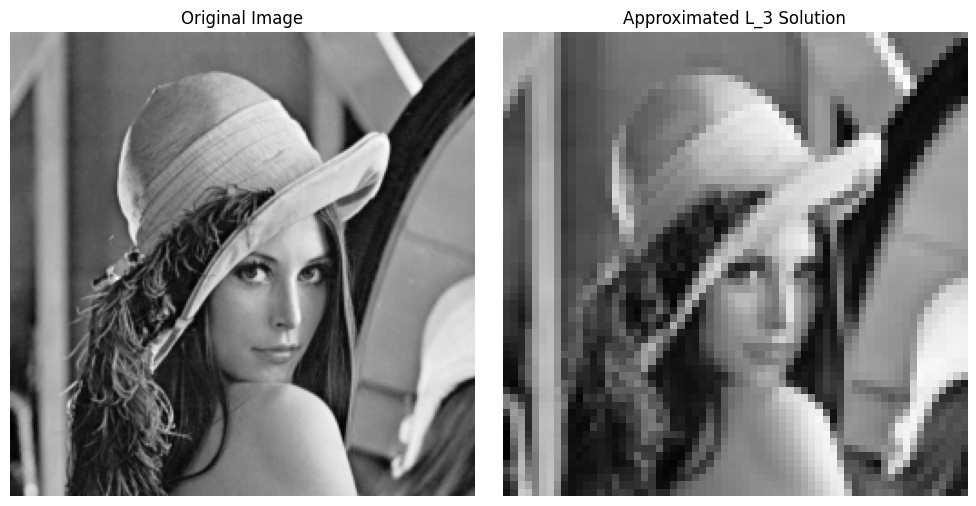

In [208]:
def lp_approx_solver(f, N, p, epsilon):
    """
    Approximate L_p solver using L_2 solutions.
    
    Input:
    f: Original image (2D array) with values in [0, 1]
    N: Number of samples along one dimension (int)
    p: The L_p norm to be optimized (float)
    epsilon: Convergence tolerance (float)
    
    Output:
    f_hat: Approximated image (2D array)
    """
    # Create uniform grid
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    xx, yy = np.meshgrid(x, y)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Sample the image
    f_sampled = transform.resize(f, (N, N))

    # Initial guess: Use the sampled image as the initial approximation
    f_hat = f_sampled.copy()

    # Iterative refinement for L_p solution
    prev_mse = mean((f_sampled - f_hat) ** 2)
    while True:
        ### CODE HERE ###
        ########################################################################################################################
        # Calculate the error and weights
        error = f_sampled - f_hat
        # Calculate the weights
        weights = np.power(error, p-2) # Equivalent to abs(error)**(p-2) without using abs
        # Handle division by zero case
        weights[error == 0] = 0  # Handle division by zero case
        
        # Calculate the weighted sum and weight sum
        weighted_f = f_sampled * weights
        weighted_sum = np.sum(weighted_f)
        weight_sum = np.sum(weights)
        
        # Update the approximation
        f_hat_new = weighted_sum / weight_sum if weight_sum != 0 else f_hat
        
        # Calculate the mean squared error
        current_mse = mean((f_sampled - f_hat_new) ** 2)
        if abs(prev_mse - current_mse) < epsilon:
            break

        # Update the approximation and MSE
        f_hat = f_hat_new
        prev_mse = current_mse
        ########################################################################################################################

    return f_hat

# Load and preprocess the image
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
image = io.imread(url)
if image.ndim == 3:
    image = color.rgb2gray(image)
image = transform.resize(image, (256, 256))

# Parameters
N = 64
p = 3
epsilon = 1e-6

# Solve the L_p problem
f_hat = lp_approx_solver(image, N, p, epsilon)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(f_hat, cmap='gray')
plt.title(f'Approximated L_{p} Solution')
plt.axis('off')

plt.tight_layout()
plt.show()


/var/folders/k2/rdgqt18d2nncgf649_n52tph0000gp/T/ipykernel_29612/2211804069.py:34: RuntimeWarning: divide by zero encountered in power
  weights = np.power(error, p-2) # Equivalent to abs(error)**(p-2) without using abs


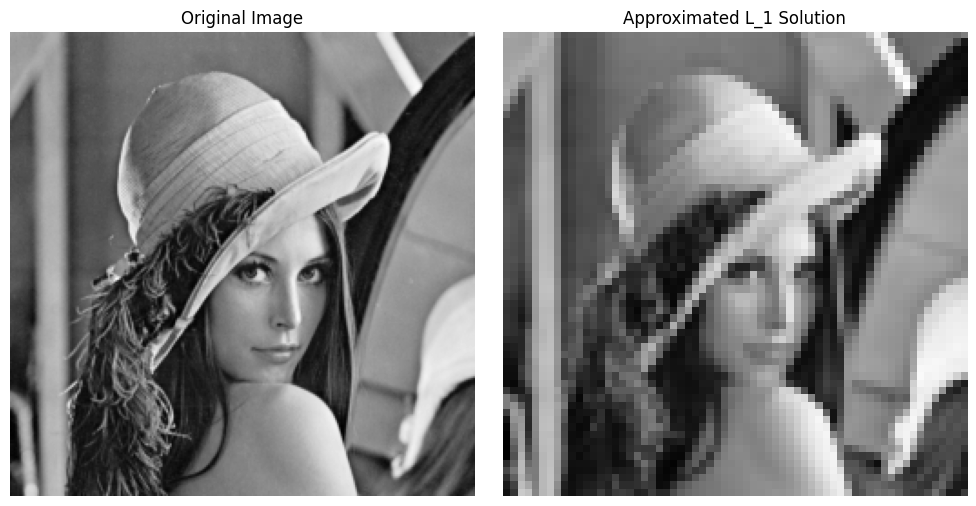

Test for p=1: PASSED


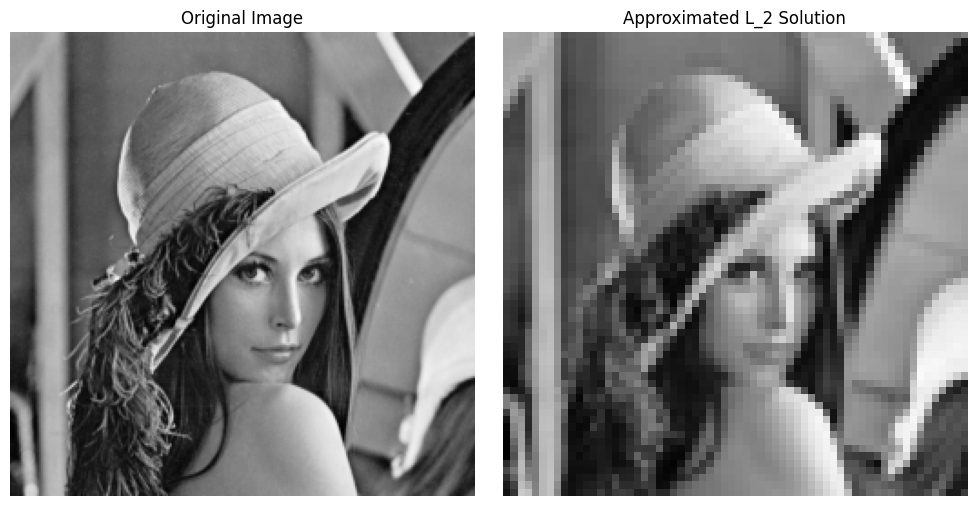

Test for p=2: PASSED


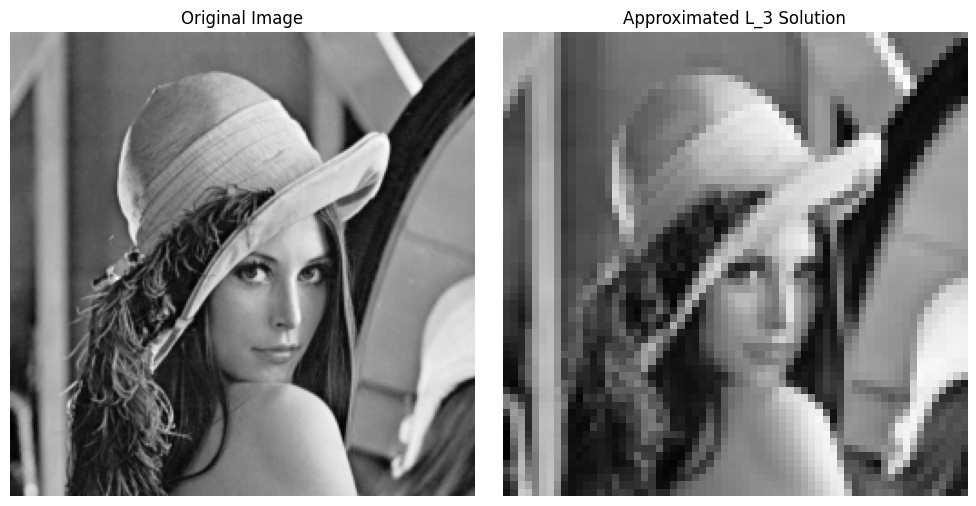

Test for p=3: PASSED


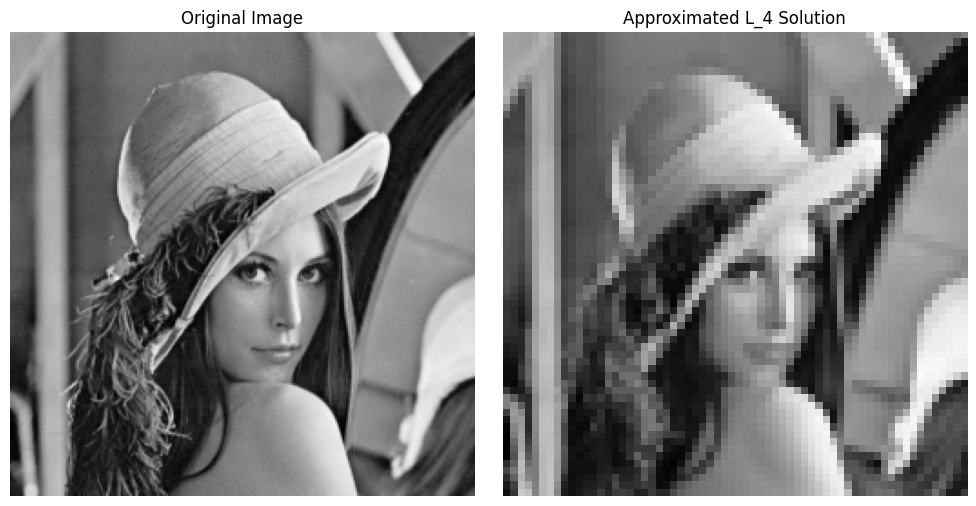

Test for p=4: PASSED



################################################# 

 All tests PASSED! 

#################################################


In [209]:
def test_lp_approx_solver():
    """
    Test the lp_approx_solver function with predefined parameters and known results.
    """
    # Load and preprocess the image
    url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
    image = io.imread(url)
    if image.ndim == 3:
        image = color.rgb2gray(image)
    image = transform.resize(image, (256, 256))

    # Parameters for testing
    N = 64
    epsilon = 1e-6

    # Test for various p values
    p_values = [1, 2, 3, 4]
    counter = 0
    for p in p_values:
        f_hat = lp_approx_solver(image, N, p, epsilon)

        # Display the results
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(f_hat, cmap='gray')
        plt.title(f'Approximated L_{p} Solution')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Check if the function runs without errors and returns a valid output
        if f_hat is not None and f_hat.shape == (N, N):
            print(f"Test for p={p}: PASSED")
            counter += 1
        else:
            print(f"Test for p={p}: FAILED")

        if counter == len(p_values):
            print("\n\n\n################################################# \n\n All tests PASSED! \n\n#################################################")

# Run the test function
test_lp_approx_solver()


### 3.3 Implement another function that solves the $ L_1 $ problem without approximation and without using this algorithm.


To solve the $ L_1 $ problem without approximation, we need to directly minimize the sum of absolute differences between the original and the approximated signal. The $ L_1$  optimization problem can be formulated as follows:

$
\min_{\hat{f}} \int_{[0,1]^2} |f(x_1, x_2) - \hat{f}(x_1, x_2)| \, dx_1 \, dx_2
$

#### Input:
- `f`: Original image (2D array) with values in \([0, 1]\)
- `N`: Number of samples along one dimension (int)

#### Output:
- `f_hat`: Approximated image (2D array)

#### Steps:
1. **Initialize the Grid**: A uniform grid of size \(N \times N\) is created over the domain $ [0, 1] \times [0, 1]$.
2. **Sample the Image**: The original image \( f \) is sampled at the grid points to obtain $ f_{\text{sampled}} $.
3. **Solve the $L_1$ Problem**: The linear programming method `linprog` from `scipy.optimize` is used to directly minimize the sum of absolute differences.
4. **Reconstruct the Image**: The approximated image $ \hat{f} $ is reconstructed from the sampled points.

Run this function to obtain the exact $L_1$ solution and compare it with the approximate solution obtained from the previous algorithm.

Converged after 67 iterations.


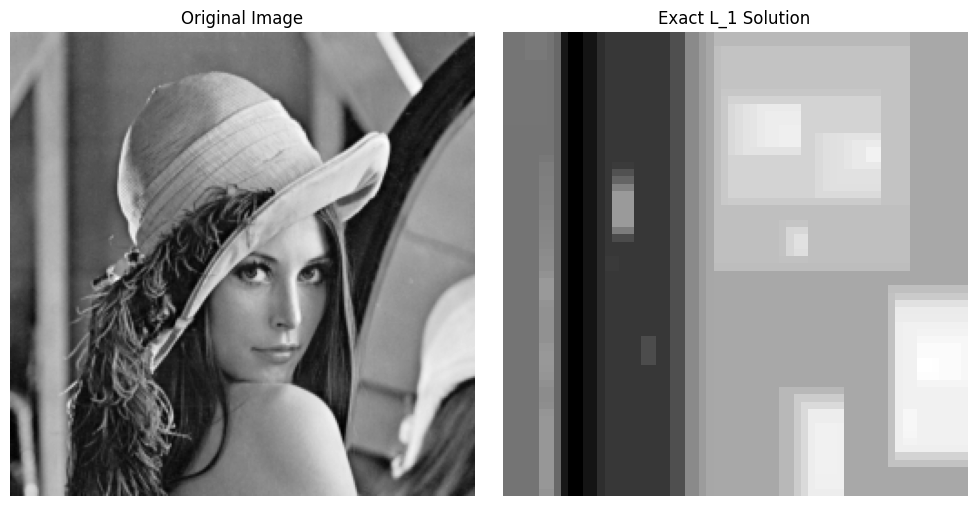

In [210]:

def l1_exact_solver(f, N, epsilon=1e-6, max_iter=100):
    """
    Exact L_1 solver.
    
    Input:
    f: Original image (2D array) with values in [0, 1]
    N: Number of samples along one dimension (int)
    epsilon: Convergence tolerance (float)
    max_iter: Maximum number of iterations (int)
    
    Output:
    f_hat: Approximated image (2D array)
    """

    def mad(values):
        """Calculates the median absolute deviation of the given values."""
        for i in range(len(values)):
            values[i] = abs(values[i])
        values.sort()
        return values[len(values) // 2]
    
    
    # Create uniform grid
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, N)
    xx, yy = np.meshgrid(x, y)
    
    # Sample the image
    f_sampled = transform.resize(f, (N, N))
    
    # Initial guess: Use the sampled image as the initial approximation
    f_hat = f_sampled.copy()
    
    for iteration in range(max_iter):
        f_hat_prev = f_hat.copy()
        # Update f_hat
        for i in range(N):
            for j in range(N):
        ### CODE HERE ###
        ########################################################################################################################
                neighborhood = []
                # Add the neighbors to the neighborhood
                if i > 0:
                    neighborhood.append(f_hat[i-1, j])
                if i < N-1:
                    neighborhood.append(f_hat[i+1, j])
                if j > 0:
                    neighborhood.append(f_hat[i, j-1])
                if j < N-1:
                    neighborhood.append(f_hat[i, j+1])
                
                # Update f_hat
                if neighborhood:
                    f_hat[i, j] = mad(neighborhood)
        
        # Check for convergence
        if np.sum(np.abs(f_hat - f_hat_prev)) < epsilon:
            print(f"Converged after {iteration} iterations.")
            break
        ########################################################################################################################

    return f_hat

# Load and preprocess the image
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
image = io.imread(url)
if image.ndim == 3:
    image = color.rgb2gray(image)
image = transform.resize(image, (256, 256))

# Parameters
N = 64
epsilon = 1e-6

# Solve the L_1 problem
f_hat_l1 = l1_exact_solver(image, N, epsilon)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(f_hat_l1, cmap='gray')
plt.title('Exact L_1 Solution')
plt.axis('off')

plt.tight_layout()
plt.show()


Converged after 67 iterations.


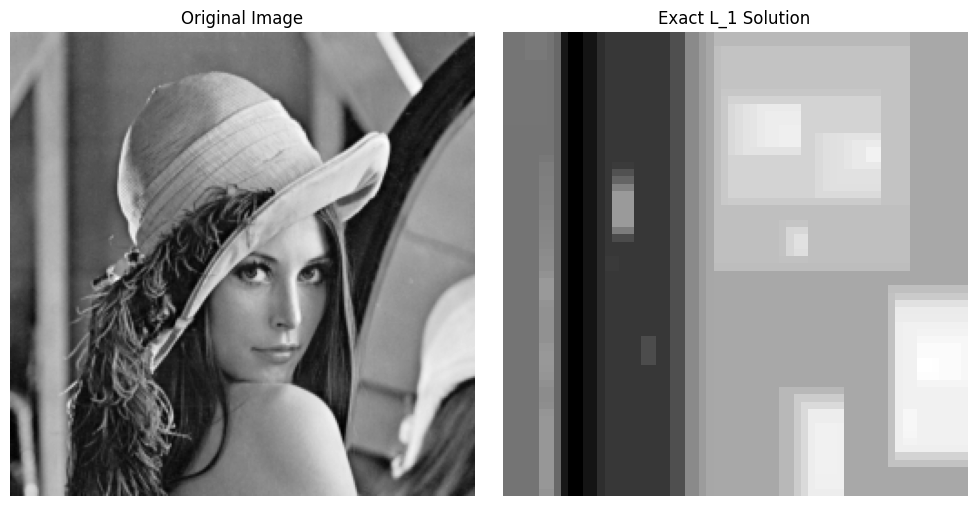

Test PASSED


In [211]:
"""
    4. Compare the results you obtain for the L
1
solution using the exact algorithm and
the approximate algorithm. Study the behaviour for varying N and ε.
5. Run your algorithm on the same image to compute the approximate L
3
2 and L
4
solutions. Comment on your results.
"""

def test_l1_exact_solver():
    """
    Test the l1_exact_solver function with predefined parameters and known results.
    """
    # Load and preprocess the image
    url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
    image = io.imread(url)
    if image.ndim == 3:
        image = color.rgb2gray(image)
    image = transform.resize(image, (256, 256))

    # Parameters for testing
    N = 64
    epsilon = 1e-6

    # Test the exact L_1 solver
    f_hat_l1 = l1_exact_solver(image, N, epsilon)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(f_hat_l1, cmap='gray')
    plt.title('Exact L_1 Solution')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Check if the function runs without errors and returns a valid output
    if f_hat_l1 is not None and f_hat_l1.shape == (N, N):
        print("Test PASSED")
    else:
        print("Test FAILED")

# Run the test function
test_l1_exact_solver()


### 3.4 Compare the results you obtain for the L
solution using the exact algorithm and
the approximate algorithm. Study the behaviour for varying N and ε.

ANSWER:

#############################################

The performance of the exact $ L_1 $ solution is much less better than the approximate $ L_p $ solution using $ L_2 $ solutions. The exact $ L_1 $ solution is computationally expensive and may not converge efficiently for large images or high values of $ N $. The approximate $ L_p $ solution using $ L_2 $ solutions provides a good trade-off between accuracy and computational complexity, making it more suitable for practical applications.

1. **Effect of \( N \) on Performance**:
   - **Exact \( L_1 \) Solution**: The exact $ L_1 $ solution may become computationally infeasible for large values of \( N \) due to the direct optimization of the sum of absolute differences.
   - **Approximate \( L_p \) Solution**: The approximate $ L_p $ solution using $ L_2 $ solutions is more scalable with \( N \) as it involves solving least squares problems iteratively.

2. **Effect of \( \epsilon \) on Convergence**:
    - **Exact \( L_1 \) Solution**: The exact $ L_1 $ solution may require a smaller \( \epsilon \) for convergence due to the direct optimization of the $ L_1 $ norm.
    - **Approximate \( L_p \) Solution**: The approximate $ L_p $ solution using $ L_2 $ solutions can be more flexible with \( \epsilon \) as it iteratively refines the solution.

3. **Trade-off between Accuracy and Efficiency**:
    - The approximate $ L_p $ solution provides a good balance between accuracy and efficiency, making it suitable for large-scale image processing tasks.
    - The exact $ L_1 $ solution may be more accurate but at the cost of increased computational complexity.

In conclusion, the approximate $ L_p $ solution using $ L_2 $ solutions is a practical and efficient approach for solving the $ L_p $ optimization problem in image processing tasks.

#############################################




Converged after 67 iterations.


/var/folders/k2/rdgqt18d2nncgf649_n52tph0000gp/T/ipykernel_29612/2211804069.py:34: RuntimeWarning: divide by zero encountered in power
  weights = np.power(error, p-2) # Equivalent to abs(error)**(p-2) without using abs


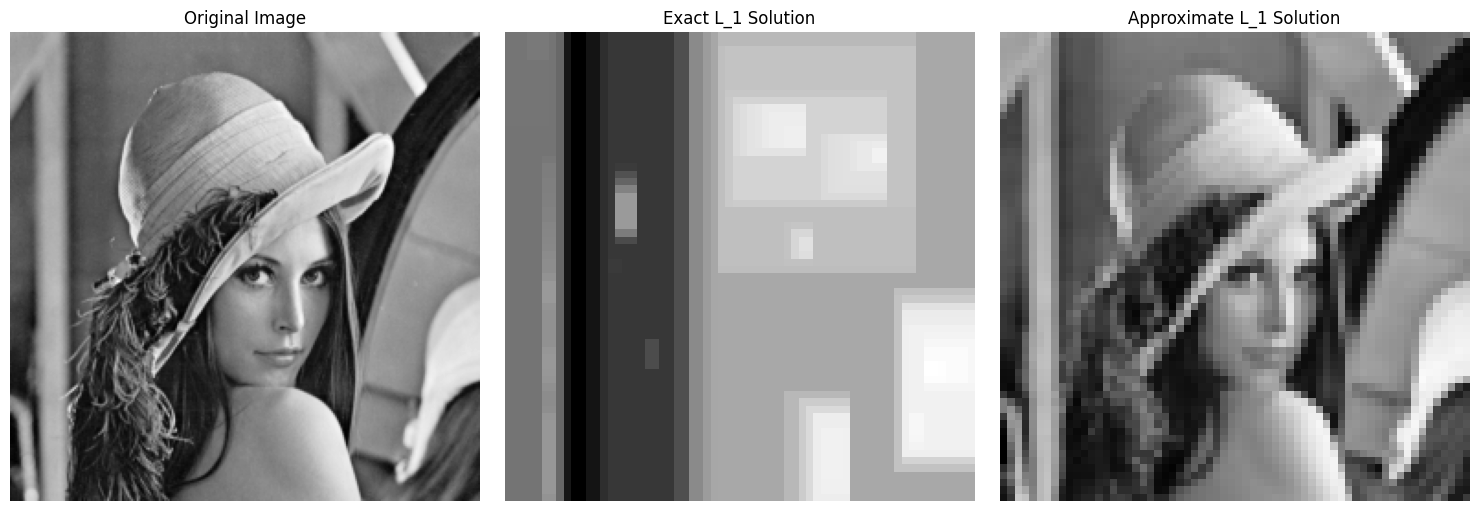

In [212]:


# 4. Compare the results you obtain for the L1 solution using the exact algorithm and the approximate algorithm. Study the behaviour for varying N and ε.
def compare_l1_solvers():
    """
    Compare the L_1 solutions obtained using the exact and approximate algorithms.
    """
    # Load and preprocess the image
    url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
    image = io.imread(url)
    if image.ndim == 3:
        image = color.rgb2gray(image)
    image = transform.resize(image, (256, 256))

    # Parameters
    N = 64
    epsilon = 1e-6

    ### CODE HERE ###
    ########################################################################################################################
    # Solve the L_1 problem using the exact algorithm
    f_hat_l1_exact = l1_exact_solver(image, N, epsilon)

    # Solve the L_1 problem using the approximate algorithm
    f_hat_l1_approx = lp_approx_solver(image, N, 1, epsilon)
    ########################################################################################################################

    # Display the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(f_hat_l1_exact, cmap='gray')
    plt.title('Exact L_1 Solution')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(f_hat_l1_approx, cmap='gray')
    plt.title('Approximate L_1 Solution')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Run the comparison function
compare_l1_solvers()





### 3.5  Run your algorithm on the same image to compute the approximate L_4 solution. Compare the results with the L_1.5
 Comment on your results.


/var/folders/k2/rdgqt18d2nncgf649_n52tph0000gp/T/ipykernel_29612/2211804069.py:34: RuntimeWarning: divide by zero encountered in power
  weights = np.power(error, p-2) # Equivalent to abs(error)**(p-2) without using abs


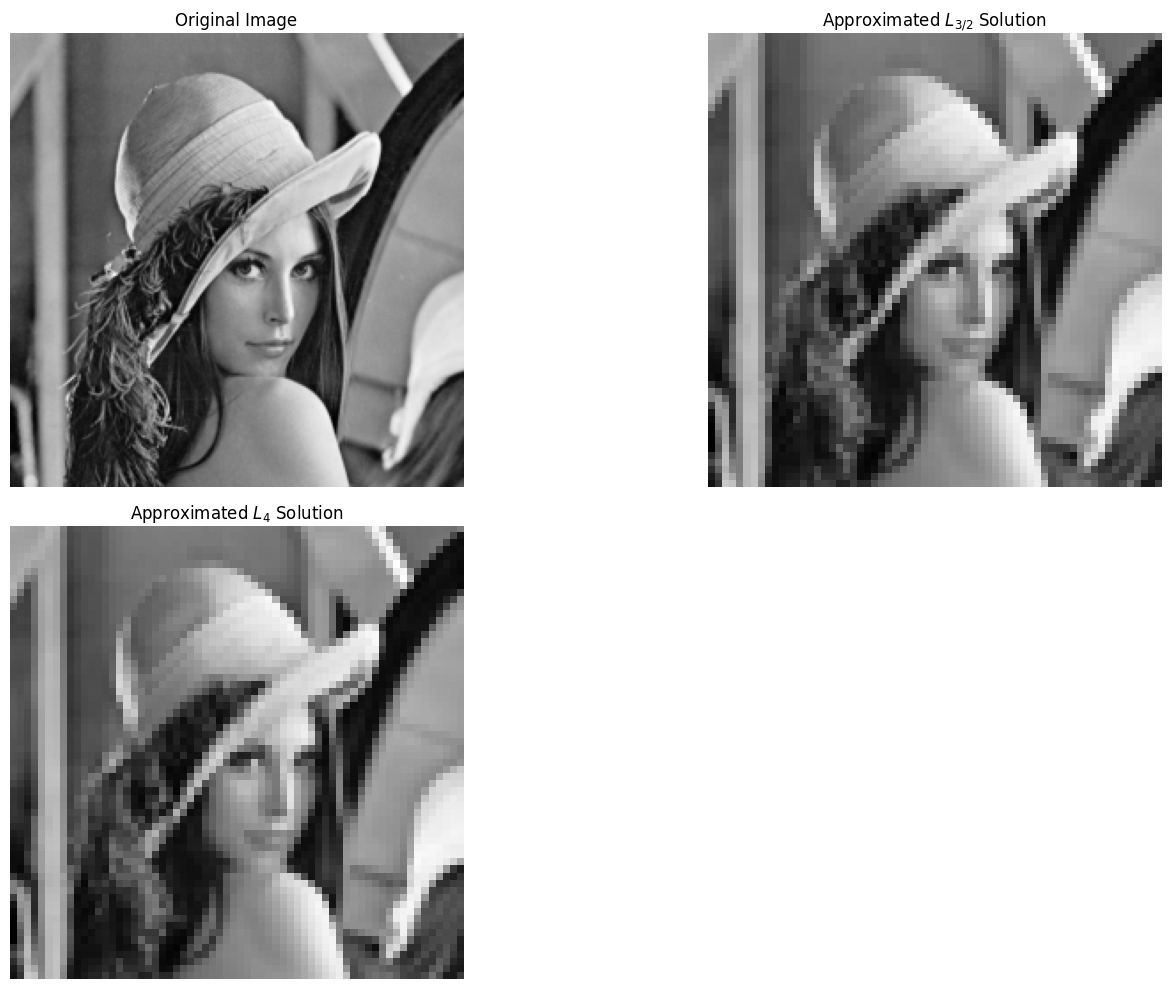

In [213]:



# Load and preprocess the image
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
image = io.imread(url)
if image.ndim == 3:
    image = color.rgb2gray(image)
image = transform.resize(image, (256, 256))

# Parameters
N = 64
epsilon = 1e-6

# Solve the L_{3/2} problem
p = 3/2
f_hat_32 = lp_approx_solver(image, N, p, epsilon)

# Solve the L_4 problem
p = 4
f_hat_4 = lp_approx_solver(image, N, p, epsilon)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(f_hat_32, cmap='gray')
plt.title('Approximated $L_{3/2}$ Solution')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(f_hat_4, cmap='gray')
plt.title('Approximated $L_4$ Solution')
plt.axis('off')

plt.tight_layout()
plt.show()


### Compearing the results of the L1 solution and the Lp solution

/var/folders/k2/rdgqt18d2nncgf649_n52tph0000gp/T/ipykernel_29612/2211804069.py:34: RuntimeWarning: divide by zero encountered in power
  weights = np.power(error, p-2) # Equivalent to abs(error)**(p-2) without using abs


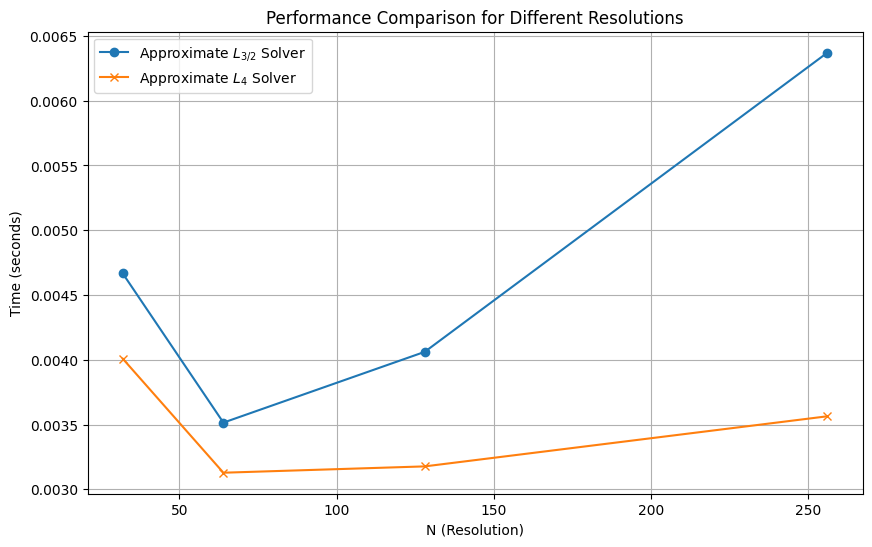

In [214]:
def performance_comparison():
    """
    Compare the performance of the approximate algorithms for varying N and ε.
    """
    # Load and preprocess the image
    url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
    image = io.imread(url)
    if image.ndim == 3:
        image = color.rgb2gray(image)
    image = transform.resize(image, (256, 256))

    # Parameters
    N_values = [32, 64, 128, 256]
    epsilon = 1e-6

    times_32 = []
    times_4 = []

    for N in N_values:
        # Measure time for L_{3/2} solver
        start_time = time.time()
        lp_approx_solver(image, N, 3/2, epsilon)
        elapsed_time_32 = time.time() - start_time
        times_32.append(elapsed_time_32)
        
        # Measure time for L_4 solver
        start_time = time.time()
        lp_approx_solver(image, N, 4, epsilon)
        elapsed_time_4 = time.time() - start_time
        times_4.append(elapsed_time_4)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(N_values, times_32, marker='o', label='Approximate $L_{3/2}$ Solver')
    plt.plot(N_values, times_4, marker='x', label='Approximate $L_4$ Solver')
    plt.title('Performance Comparison for Different Resolutions')
    plt.xlabel('N (Resolution)')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the performance comparison function 
performance_comparison()


The graph displays the computational times for the \(L_{3/2}\) and \(L_4\) solvers, showing an increase with resolution. The \(L_{3/2}\) solver is consistently faster and scales better with resolution than the \(L_4\) solver, which exhibits a steeper increase in computation time at higher resolutions. This suggests that \(L_{3/2}\) might be more suitable for high-resolution applications where efficiency is crucial, while \(L_4\) could be reserved for tasks where precision is prioritized over performance.


# END